<a href="https://colab.research.google.com/github/etgins/Computer-Vision-Alg-App-HW/blob/main/ee046746_hw2_311487714_312344245.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Deep Neural Networks, Classifiers & Features
---

### <a style='color:red'> Due Date: 20.05.2021 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
        * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.
* You should submit two **separated** files:
    * A compressed `.zip` file, with the name: `ee046746_hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside (`.py` or `.ipynb` ONLY!), and all the files required for the code to run (your own images/videos).
            * **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `ee046746_hw2_id1_id2.pdf`.
    * **DON'T** submit the SVHN dataset in your submission, we have a local copy of it.
    * **DON'T** submit the trained networks, but make sure to document every result you get.
        * Be precise, we expect on point answers.
        * No other file-types (`.docx`, `.html`, ...) will be accepted.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify house number digits from the **The Street View House Numbers (SVHN)** Dataset. 

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

* 10 classes, 1 for each digit. Digit '0' has label 0, '1' has label 1,...
* 73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data.

<img src="http://ufldl.stanford.edu/housenumbers/32x32eg.png" style="height:250px">

1. Load the SVHN dataset with PyTorch using `torchvision.datasets.SVHN(root, split='train', transform=None, target_transform=None, download=True)` (<a href="https://pytorch.org/docs/stable/torchvision/datasets.html#svhn"> read more here</a>). Display 5 images from the train set.
2. Use the CNN from tutorials 3-4 (`CifarCnn()`) and train it on the SVHN dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 3-4.
3. Design a Convolutional Neural Network (CNN) to classify digits from the images. You can modify the network from section 2, but **you must get a better result than your baseline accuracy from section 2**.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.
4. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

1.1 load SVHN dataset

Using downloaded and verified file: ./datasets/train_32x32.mat
Using downloaded and verified file: ./datasets/test_32x32.mat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


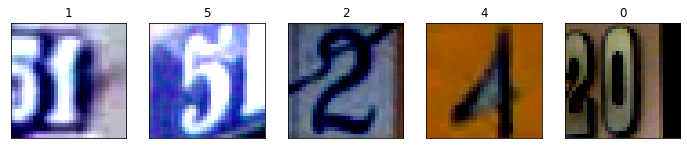

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy
import scipy.ndimage
from scipy import io
import math
%matplotlib inline
import time
import os
import PIL
from PIL import Image

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Load datasets as in tutorial 

# define transform for train & test
transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# load train and test sets using transforms above
trainset = torchvision.datasets.SVHN(
    root='./datasets', split='train', download=True, transform=transform_train)

testset = torchvision.datasets.SVHN(
    root='./datasets', split='test', download=True, transform=transform_test)

classes = ('0','1', '2', '3', '4', '5', 
           '6', '7', '8', '9')
# display 5 images from the training set:

# using tutorial func:
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range - approximately...
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=5,
                                          shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])


1.2 Using the CNN from tutorials 3-4

In [ ]:
# using tutorial network class:
class SVHN_CNN(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(SVHN_CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
# train given model

# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = SVHN_CNN().to(device) # no need for parameters as we alredy defined them in the class

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [ ]:
# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/svhn_cnn_ckpt.pth')

print('==> Finished Training ...')


KeyboardInterrupt: ignored

test accuracy: 93.831%


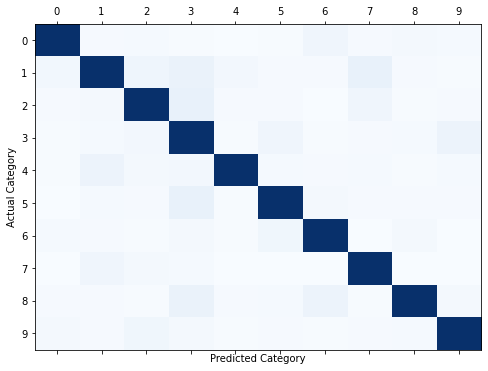

In [ ]:

# load model, calculate accuracy and confusion matrix
model = SVHN_CNN().to(device)
state = torch.load('./checkpoints/svhn_cnn_ckpt.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [ ]:
class MY_SVHN_CNN(nn.Module):
    """CNN for MY SVHN Dataset"""

    def __init__(self):
        """CNN Builder."""
        super(MY_SVHN_CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.6),
            nn.Linear(4096, 1024),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(negative_slope=0.08, inplace=True),
            nn.Dropout(p=0.6),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
# train my model

# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 25

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = MY_SVHN_CNN().to(device) # no need for parameters as we alredy defined them in the class

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    

    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 25 == 0:
        test_accuracy, _ = calculate_accuracy(model, testloader, device)
        log = "\nTesting accuracy: {:.3f}%".format(test_accuracy)
        print(log)
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/my_svhn_cnn_ckpt.pth')

print('==> Finished Training ...')

Epoch: 1 | Loss: 0.9680 | Training accuracy: 89.540% | Epoch Time: 36.71 secs
Epoch: 2 | Loss: 0.3572 | Training accuracy: 92.495% | Epoch Time: 37.04 secs
Epoch: 3 | Loss: 0.2815 | Training accuracy: 94.489% | Epoch Time: 37.29 secs
Epoch: 4 | Loss: 0.2403 | Training accuracy: 95.606% | Epoch Time: 37.72 secs
Epoch: 5 | Loss: 0.2111 | Training accuracy: 96.050% | Epoch Time: 37.97 secs
Epoch: 6 | Loss: 0.1878 | Training accuracy: 96.608% | Epoch Time: 38.08 secs
Epoch: 7 | Loss: 0.1696 | Training accuracy: 97.169% | Epoch Time: 38.08 secs
Epoch: 8 | Loss: 0.1565 | Training accuracy: 97.667% | Epoch Time: 38.03 secs
Epoch: 9 | Loss: 0.1414 | Training accuracy: 97.955% | Epoch Time: 37.92 secs
Epoch: 10 | Loss: 0.1308 | Training accuracy: 97.978% | Epoch Time: 38.17 secs
Epoch: 11 | Loss: 0.1182 | Training accuracy: 98.407% | Epoch Time: 37.87 secs
Epoch: 12 | Loss: 0.1087 | Training accuracy: 98.687% | Epoch Time: 37.87 secs
Epoch: 13 | Loss: 0.1007 | Training accuracy: 98.866% | Epoch

In [ ]:
# test_accuracy, _ = calculate_accuracy(model, testloader, device)
# log = "\nTesting accuracy: {:.3f}%".format(test_accuracy)
# print(log)

test accuracy: 94.856%


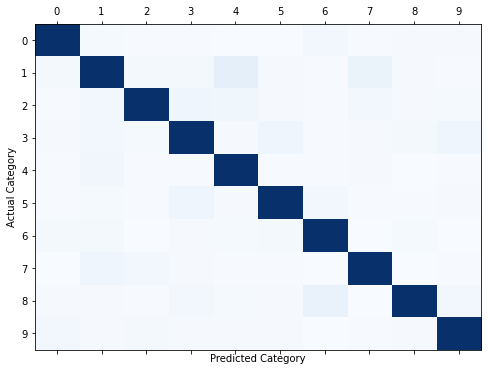

num trainable weights:  5852170


In [ ]:

# load model, calculate accuracy and confusion matrix
model = MY_SVHN_CNN().to(device)
state = torch.load('./checkpoints/my_svhn_cnn_ckpt.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()


# calculating the number of trainable weights - by tutorial 
num_trainable_params = sum([p.numel() for p in model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)

#### Part 2 - Analyzing a Pre-trained CNN
---
In this part you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. 

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`

<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>

1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`). 
2. Load the images in the `./birds` folder and display them.
3. Pre-process the images to fit VGG16's architecture. What steps did you take?
4. Feed the images (forward pass) to the model. What are the outputs?
5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?
6. Apply the following 3 transformations to create 3 *new* images from the image from step 5, and display them (`opencv` has functions for all):
    * One **geometric transformation** (rotation, scaling, translation, warping...).
    * One **color transformation** (thresholding, different color space, hue, saturation, brightness, contrast...).
    * One **filter** (any filter you want).
7. Feed the transformed images to network, what is the output? is it different than section 5?
8. For the first 3 filters in the *first layer* of VGG16, plot the filters, and then plot their response (their output) for the image from section 5 and the 3 images from section 6 (total of 4 input images). Explain what do you see.
    * Consult `ee046746_appndx_visualizing_cnn_filters.ipynb` to refresh your memory.
9. For each image in the `./dogs` and `./cats` folders, extract and save their feature vectors (create a numpy array or a torch tensor that contains the features for all samples) from a fully-connected layer (such as `FC7`) of the VGG16 model. Which layer did you pick? What is the size of the feature space?
    * You need to write a function that does the feed forward manually until the desired layer. See the example in `ee046746_appndx_visualizing_cnn_filters.ipynb`. 
10. Build a Support Vector Machine (SVM) classifier (hint: `sklearn.svm.LinearSVC`) to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than SVM from the `scikit-learn` library, no need to explain how it works (but report the name of the algorithm you used). What are the results?

2.1 & 2.2 Loading pre-trained VGG16, and birds photos


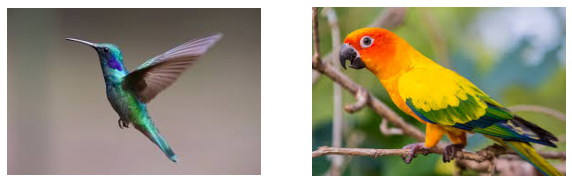

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16_pretrained = torchvision.models.vgg16(pretrained=True, progress=True).to(device)

bird_0 = cv2.imread('../birds/bird_0.jpg')
bird_1 = cv2.imread('../birds/bird_1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].imshow(cv2.cvtColor(bird_0, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(bird_1, cv2.COLOR_BGR2RGB))
_ = axes[0].axis('off')
_ = axes[1].axis('off')



2.3 Pre-Process images to fit VGG16


In [ ]:
def fit_to_vgg16(im,size,device=torch.device("cpu")):

    transform = transforms.Compose([
                    transforms.Resize((size,size)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])    
    return ((transform(im)).unsqueeze(0).to(device))

In [ ]:

bird_0_toVGG = fit_to_vgg16(Image.open("../birds/bird_0.jpg"), 224,device)
bird_1_toVGG = fit_to_vgg16(Image.open("../birds/bird_1.jpg"), 224,device)


2.4 Feed the images (forward pass) to the model

In [ ]:
import json
with open('./imagenet_class_index.json', 'r') as f:
    labels = json.load(f)

labels = {int(key): value[1] for key, value in labels.items()}

# function assuming vgg 16 in eval mode, and given image fits to vgg 16. print vgg 16 prediction for given image 
def vgg16_predict(im,im_title):
  with torch.no_grad():
    im_vgg_output = vgg16_pretrained(im)
    _, im_vgg_pred = torch.max(im_vgg_output.data, 1)
    idx = im_vgg_pred.item()
    print('for '+ im_title + ' VGG 16 predicted: {0}'.format(labels[idx] ))
  return

In [ ]:

# verify eval mode
vgg16_pretrained.eval()
# feed fwd & predict
vgg16_predict(bird_0_toVGG,'bird 0')
vgg16_predict(bird_1_toVGG,'bird 1')

for bird 0 VGG 16 predicted: hummingbird
for bird 1 VGG 16 predicted: lorikeet


2.5 my lovely dog (Aya) prediction


for Aya VGG 16 predicted: malinois


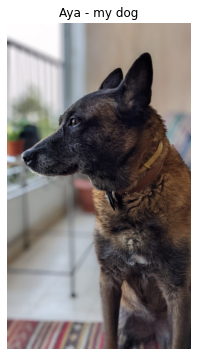

In [ ]:
aya = cv2.imread('../data/aya.jpeg')
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.imshow(cv2.cvtColor(aya, cv2.COLOR_BGR2RGB))
axes.set_title('Aya - my dog')
_ = axes.axis('off')

aya_im = Image.open("../data/aya.jpeg")
aya_toVGG = fit_to_vgg16(aya_im, 224,device)
vgg16_predict(aya_toVGG,'Aya')


2.6 Apply 3 transformations to create 3 new images from aya 

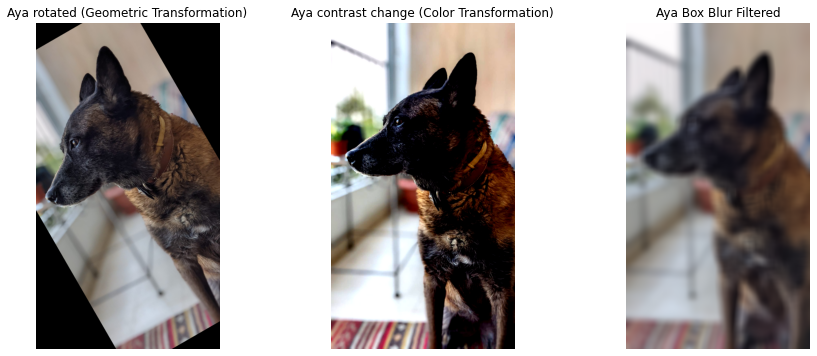

In [ ]:
# 3 transformations on aya:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# 1. Geometric transformation (rotation, scaling, translation, warping...)
aya_geo = aya_im.rotate(30)
axes[0].imshow(aya_geo)
axes[0].set_title('Aya rotated (Geometric Transformation)')
_ = axes[0].axis('off')

# 2. Color transformation (thresholding, different color space, hue, saturation, brightness, contrast...)
aya_contrasted = (PIL.ImageEnhance.Contrast(aya_im)).enhance(1.8)
axes[1].imshow(aya_contrasted)
axes[1].set_title('Aya contrast change (Color Transformation)')
_ = axes[1].axis('off')

# 3. Filter (any filter you want)
aya_boxBlur = aya_im.filter(PIL.ImageFilter.BoxBlur(20))
axes[2].imshow(aya_boxBlur)
axes[2].set_title('Aya Box Blur Filtered')
_ = axes[2].axis('off')


2.7 Feed the transformed images to network

In [ ]:
# verify still in eval mode
vgg16_pretrained.eval()

# for each image - fit to vgg, and use vgg 16 to feed fwd & predict 

aya_geo_toVGG = fit_to_vgg16(aya_geo, 224,device)
vgg16_predict(aya_geo_toVGG,'Aya rotated')

aya_contrasted_toVGG = fit_to_vgg16(aya_contrasted, 224,device)
vgg16_predict(aya_contrasted_toVGG,'Aya contrasted')

aya_boxBlur_toVGG = fit_to_vgg16(aya_boxBlur, 224,device)
vgg16_predict(aya_boxBlur_toVGG,'Aya box blur filtered')


for Aya rotated VGG 16 predicted: Norwegian_elkhound
for Aya contrasted VGG 16 predicted: malinois
for Aya box blur filtered VGG 16 predicted: malinois


2.8 For the first 3 filters in the first layer of VGG16, plot the filters, and plot their response for previous images.

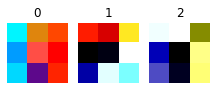

In [ ]:
# plot the filters
# using functions from appndix tutorial
def plot_filters_multi_channel(t,filters_amount):
    
    # get the number of kernals
    num_kernels = t.shape[0]    
    
    # define number of columns for subplots
    num_cols = 12
    # rows = num of kernels
    num_rows = num_kernels
    
    # set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    # looping through all the kernels
    for i in range(filters_amount):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        # for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].data.cpu().numpy(), np.float32)
        # standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
#     plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    
    
def plot_weights(model, layer_num, filters_amount):
    # extracting the model features at the particular layer number
    layer = model.features[layer_num]
  
    # checking whether the layer is convolution layer or not 
    if isinstance(layer, nn.Conv2d):
        # getting the weight tensor data
        weight_tensor = model.features[layer_num].weight.data
        if weight_tensor.shape[1] == 3:
            plot_filters_multi_channel(weight_tensor,filters_amount)
        else:
            print("Can only plot weights with three channels with single channel = False")
    else:
        print("Can only visualize layers which are convolutional")

# visualize weights for vgg16 - first conv layer
plot_weights(vgg16_pretrained,  layer_num=0, filters_amount=3 )



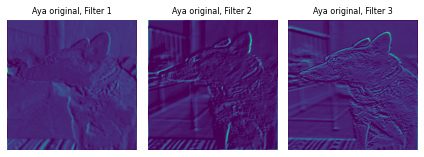

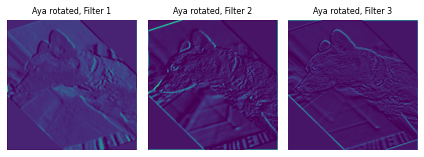

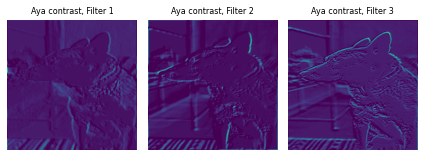

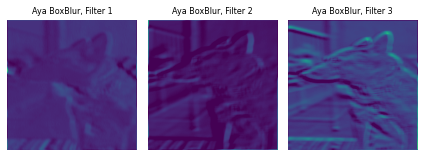

In [ ]:
# plot their response for the previous images (total of 4 input images)
# function based on to filter_output function from appendix tutorial
def filter_outputs(image, model,layer_to_visualize, filters_amount=3, im_name=''):
    modulelist = list(model.features.modules())
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    # outputs = []
    
    # for layer in modulelist[1:2]:
    #     image = layer(image)        
    
    # output = image.data.squeeze().cpu().numpy()
    filters_res = []
    
    for count, layer in enumerate(modulelist[1:]):
        image = layer(image)
        if count == layer_to_visualize: 
            output = image            
        
    output = output.data.squeeze().cpu().numpy()
    for i in range(filters_amount):
        filters_res.append(output[i,:,:])

    fig = plt.figure()
    # fig.suptitle('Layer 1 output of '+im_name , fontsize=8);
    for i in range(filters_amount):
        a = fig.add_subplot(1, 3, i+1)
        plt.imshow(filters_res[i])
        a.set_axis_off()
        a.set_title(im_name+ ', Filter '+ str(i+1), fontsize=8)
    plt.tight_layout()
    


filters_amount = 3
aya_amount = 4        
filter_outputs(aya_toVGG, vgg16_pretrained,0,filters_amount,'Aya original')
filter_outputs(aya_geo_toVGG, vgg16_pretrained,0,filters_amount,'Aya rotated')
filter_outputs(aya_contrasted_toVGG, vgg16_pretrained,0,filters_amount,'Aya contrast')
filter_outputs(aya_boxBlur_toVGG, vgg16_pretrained,0,filters_amount,'Aya BoxBlur')




2.9 For each image in the ./dogs and ./cats folders, extract and save their feature vectors from a fully-connected layer (selected the FC7) of the VGG16 model. 


In [ ]:

def extract_fc_layer_outputs(image, model):
    img_feat = model.features(image)
    # print(img_feat.shape)
    img_feat = model.avgpool(img_feat)
    # print('after avgPool:')
    # print(img_feat.shape)
    img_feat = torch.flatten(img_feat, 1)
    # print('before FC (i.e flatten output of avgPool):')
    # print(img_feat.shape)
    classifier_list=list(model.classifier.modules())
    for layer in classifier_list[1:2]:
        img_feat = layer(img_feat)
    return img_feat


In [ ]:
from PIL import Image
import glob

# get all dogs & cats as a batch of images
image_list = []
for filename in glob.glob('../dogs/*.jpg'): 
    im=Image.open(filename)
    image_list.append(fit_to_vgg16(im, 224,device))
for filename in glob.glob('../cats/*.jpg'): 
    im=Image.open(filename)
    image_list.append(fit_to_vgg16(im, 224,device))
images_batch = torch.stack(image_list, 0).squeeze()

# extract batch features
extractedFeatures = extract_fc_layer_outputs(images_batch,vgg16_pretrained) 
print(extractedFeatures.shape)
# scipy.io.savemat('extracted_features.mat', {'extractedFeatures':extractedFeatures})

torch.Size([20, 4096])


2.10 Build a Support Vector Machine (SVM) classifier to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets.(but report the name of the algorithm you used). What are the results?

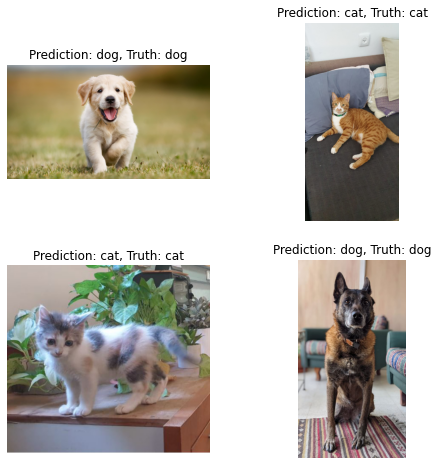

In [ ]:
from sklearn import svm
lin_svm = svm.LinearSVC()
# classes = {0: 'dog', 1: 'cat'}
classes = ['dog','cat']
labels = ['0','0','0','0','0','0','0','0','0','0','1','1','1','1','1','1','1','1','1','1',]
lin_svm.fit(extractedFeatures.cpu().detach().numpy(), labels)


testFileNames = ["../data/my_data/" + fileName for fileName in os.listdir("../data/my_data/")]
testBatch = []
for fileName in testFileNames:
    testBatch.append(fit_to_vgg16(Image.open(fileName), 224,device))
testBatch = torch.stack(testBatch, 0).squeeze()

# Test:
testFeatures = extract_fc_layer_outputs(testBatch, vgg16_pretrained)
predictions = lin_svm.predict(testFeatures.cpu().detach().numpy())
trueLabels = [0 if 'dog' in fileName else 1 for fileName in testFileNames]

# Plot results:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
for imInd in range(len(testFileNames)):
    axes[imInd//2, imInd%2].imshow(Image.open(testFileNames[imInd]))
    axes[imInd//2, imInd%2].set_title('Prediction: ' + classes[int(predictions[imInd])] + ', Truth: ' + classes[int(trueLabels[imInd])])
    axes[imInd//2, imInd%2].axis('off')

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com